# Data Centric Approach - Améliorer le dataset

#### Création d'un dataset

In [29]:
from sklearn import datasets

X, y = datasets.make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=808)

#### Visualization

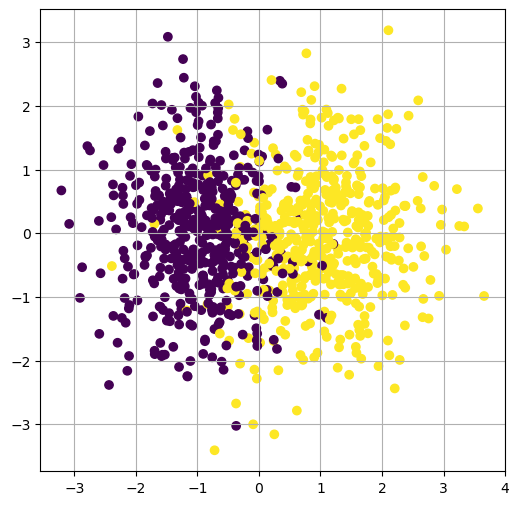

In [55]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()
plt.show()

#### Entrainement du modèle et test

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

clf = LogisticRegression(random_state=808)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=808)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.95      0.92      0.93        95

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



In [38]:
print(f"Score de la classification R^2: ", clf.score(X_test, y_test))

Score de la classification R^2:  0.935


# Excercise

## Empty values

#### Amélioration d'un dataset

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
dataset_url = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-clean-2023-09-10.csv"
df = pd.read_csv(dataset_url)

/tmp/ipykernel_2130/3948492116.py:2: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_url)


In [201]:
df.describe()

,circonference_cm,hauteur_m
count,207640.000000,207640.000000
mean,81.139703,8.817737
std,62.986148,6.128331
min,0.000000,0.000000
25%,30.000000,5.000000
50%,70.000000,8.000000
75%,115.000000,12.000000
max,1680.000000,710.000000


In [204]:
df.head()

,idbase,domanialite,arrondissement,complement_adresse,numero,lieu_adresse,idemplacement,libelle_francais,genre,espece,variete_oucultivar,circonference_cm,hauteur_m,stade_de_developpement,remarquable,geo_point_2d
0,256032,Alignement,PARIS 14E ARRDT,NaN,NaN,RUE VERCINGETORIX,000602025,Erable,Acer,pseudoplatanus,''Atropurpureum'',70.0,6.0,Jeune (arbre),NON,"48.83154687478726, 2.3093726893065596"
1,281618,Alignement,PARIS 8E ARRDT,NaN,NaN,AVENUE DES CHAMPS ELYSEES,000305044,Marronnier,Aesculus,hippocastanum,''Baumannii'',20.0,4.0,Jeune (arbre),NON,"48.86665704304558, 2.3162802812024443"
2,302647,Jardin,PARIS 8E ARRDT,Secteur Kiosque,NaN,JARDINS DES CHAMPS ELYSEES - ABORDS DU KIOSQUE...,000109003,If,Taxus,baccata,NaN,50.0,5.0,Jeune (arbre)Adulte,NON,"48.86594098488487, 2.3177825326579695"
3,238226,Alignement,PARIS 12E ARRDT,37,NaN,AVENUE DE SAINT MANDE,000501020,Platane,Platanus,x hispanica,NaN,30.0,5.0,Jeune (arbre),NON,"48.84515461889761, 2.4008303350818525"
4,110978,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT,K69K0040,Pin,Pinus,nigra,NaN,100.0,10.0,NaN,NaN,"48.87971709048107, 2.3797109748696337"


In [206]:
df = df[df['genre'] == "Platanus"]
df.head()

,idbase,domanialite,arrondissement,complement_adresse,numero,lieu_adresse,idemplacement,libelle_francais,genre,espece,variete_oucultivar,circonference_cm,hauteur_m,stade_de_developpement,remarquable,geo_point_2d
3,238226,Alignement,PARIS 12E ARRDT,37,NaN,AVENUE DE SAINT MANDE,000501020,Platane,Platanus,x hispanica,NaN,30.0,5.0,Jeune (arbre),NON,"48.84515461889761, 2.4008303350818525"
9,289464,Alignement,PARIS 12E ARRDT,NaN,NaN,AVENUE LEDRU ROLLIN,000402007,Platane,Platanus,x hispanica,NaN,60.0,10.0,Adulte,NON,"48.84717970255216, 2.37017013054543"
10,221701,Alignement,PARIS 16E ARRDT,NaN,NaN,BOULEVARD DE L AMIRAL BRUIX,000705007,Platane,Platanus,x hispanica,NaN,68.0,10.0,Jeune (arbre)Adulte,NON,"48.87428152523608, 2.2783797113253454"
11,227024,Alignement,PARIS 19E ARRDT,59,NaN,RUE DAVID D ANGERS,000901019,Platane,Platanus,x hispanica,''Pyramidalis'',30.0,5.0,Jeune (arbre),NON,"48.881527844507275, 2.395607068367473"
17,285387,Alignement,PARIS 10E ARRDT,face à peugeot à gauche des wc,NaN,RUE DU FAUBOURG SAINT MARTIN,001301027,Platane,Platanus,x hispanica,NaN,53.0,8.0,Adulte,NON,"48.878100132217135, 2.3616292876411995"


In [208]:
df.describe()

,circonference_cm,hauteur_m
count,42632.000000,42632.000000
mean,110.801206,12.811761
std,72.324237,7.032292
min,0.000000,0.000000
25%,55.000000,8.000000
50%,100.000000,12.000000
75%,155.000000,17.000000
max,1650.000000,710.000000


In [210]:
df.stade_de_developpement.value_counts(dropna = False)

stade_de_developpement
Adulte                 21628
Jeune (arbre)Adulte     8368
Jeune (arbre)           5929
NaN                     3359
Mature                  3348
Name: count, dtype: int64

In [212]:
len(df[df['circonference_cm'] == 0.0])

1592

In [214]:
len(df[df['hauteur_m'] == 0.0])

1688

#### Ordonner le df selon le stade de développement

In [217]:
cats = ['Jeune (arbre)', 'Jeune (arbre)Adulte', 'Adulte', 'Mature']

for n, cat in zip(range(1, 5), cats):
    df.loc[df.stade_de_developpement == cat, 'stade_num'] = n
df.sort_values(by = 'stade_num', inplace = True)
df.reset_index(inplace = True, drop = True)

#### Visualisation

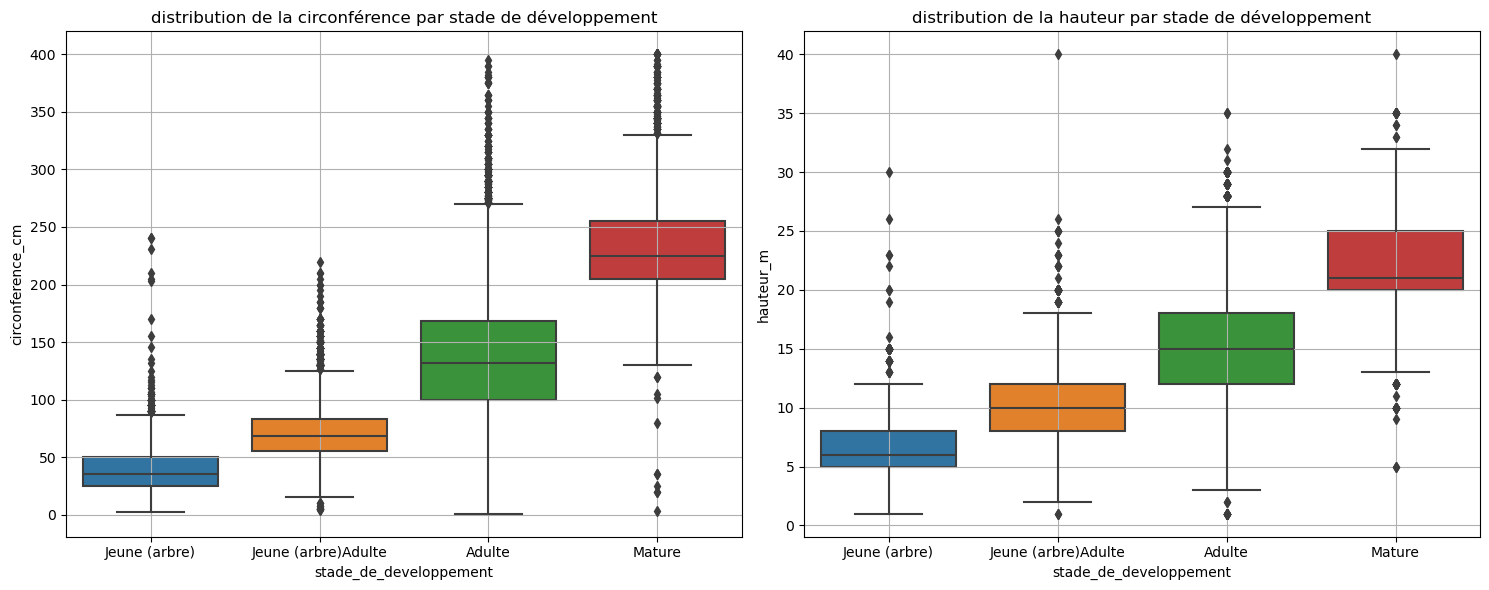

In [220]:
import seaborn as sns

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 2, 1)
sns.boxplot(data = df[~df.stade_de_developpement.isna() & (df['circonference_cm'] != 0.0) & (df['circonference_cm'] <= 400)] , y="circonference_cm", x="stade_de_developpement")
ax.grid(True, which = 'both')
ax.set_title('distribution de la circonférence par stade de développement')

ax = fig.add_subplot(1, 2, 2)
sns.boxplot(data = df[~df.stade_de_developpement.isna() & (df['hauteur_m'] != 0.0) & (df['hauteur_m'] <= 40)], y="hauteur_m", x="stade_de_developpement")
ax.grid(True, which = 'both')
ax.set_title('distribution de la hauteur par stade de développement')

plt.tight_layout()

On constate une rélation entre le stade de développement e la hauteur et la circonférence.
Donc je vais appliquer une régression linéaire pour trouver les valeurs manquantes de h et c.

#### Insertion données manquantes

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

reg = LinearRegression()

#j'utilise un df aient toutes les valeurs de stade_de_développement
data = df[~df.stade_de_developpement.isna()]

#### Numérisation de la variable stade_de_développement

In [227]:
data.loc[df.stade_de_developpement == 'Jeune (arbre)','stade_de_developpement' ]= 1
data.loc[df.stade_de_developpement == 'Jeune (arbre)Adulte', 'stade_de_developpement']= 2
data.loc[df.stade_de_developpement == 'Adulte','stade_de_developpement']= 3
data.loc[df.stade_de_developpement == 'Mature', 'stade_de_developpement']= 4
data['stade_de_developpement'] =data.stade_de_developpement.astype('int')
data['stade_de_developpement'].value_counts()

/tmp/ipykernel_2130/2612442174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stade_de_developpement'] =data.stade_de_developpement.astype('int')


stade_de_developpement
3    21628
2     8368
1     5929
4     3348
Name: count, dtype: int64

In [252]:
data_to_predict = data[(df['circonference_cm'] == 0.0)]
X = data.stade_de_developpement.values.reshape(-1, 1)
y = data.circonference_cm.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=808)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


/tmp/ipykernel_2130/1470841386.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_to_predict = data[(df['circonference_cm'] == 0.0)]


In [254]:
from sklearn.metrics import mean_absolute_percentage_error
print(f"R2 score: {reg.score(X_train, y_train)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

R2 score: 0.562465003652225
MAPE: 555949558920793.94


On ne peut pas utiliser ce modèle, réponse erronée, il aurait fallu analyser miux les rélation avec les autres variables et découvrir que finallement a plupart de ces arbres sont dans des cimetieres. Et il semble que google maps n'offre pas de street view pour ces lieux: CIMETIERE DE BAGNEUX ou CIMETIERE DE THIAIS. Donc pas moyen de savoir si ces arbres sont par exemple jeunes ou remarquables.

Donc à ce stade il semble que nous n'ayons pas d'autre choix que de supprimer ces echantillons. Il n'est pas possible d'inferer les valeurs manquantes à partir des autres valeurs ou de données complementaires.

Tu doit utiliser .value_counts() pour les colonnes et voir comment les valeurs sont reinsegnées, info() pour le df pour avoir une vue sur les valeurs non_null et shape() pour identifier les volumes

## Outliers

In [54]:
import pandas as pd

dataset_url = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-clean-2023-09-10.csv"
df = pd.read_csv(dataset_url)
df = df[df.libelle_francais == 'Platane'].copy()

/tmp/ipykernel_158/1412205584.py:4: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_url)


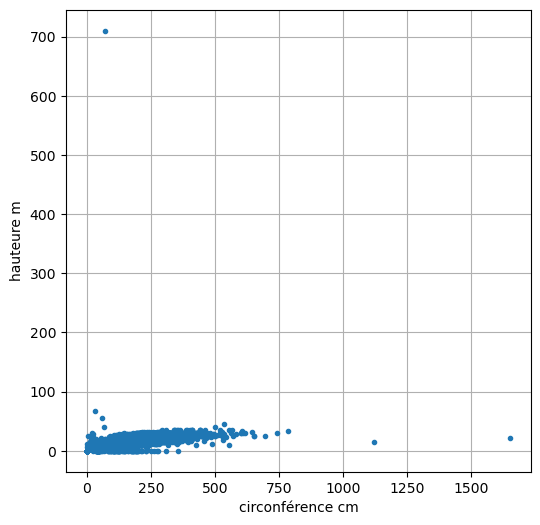

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
plt.plot(df.circonference_cm, df.hauteur_m, '.')
plt.grid()
plt.xlabel("circonférence cm")
plt.ylabel("hauteure m")

fig.show()

In [61]:
# on peut déja explure des valeures aberrantes comme circonférence > 1000 ou hauteure > 100
df = df[(df.circonference_cm < 1000) & (df.hauteur_m < 100)].copy()

### Méthode z-score

In [64]:
from scipy import stats

df["z_circonference"] = stats.zscore(df["circonference_cm"])
df["z_hauteur"] = stats.zscore(df["hauteur_m"])


Text(0.5, 1.0, 'hauteur - z-score')

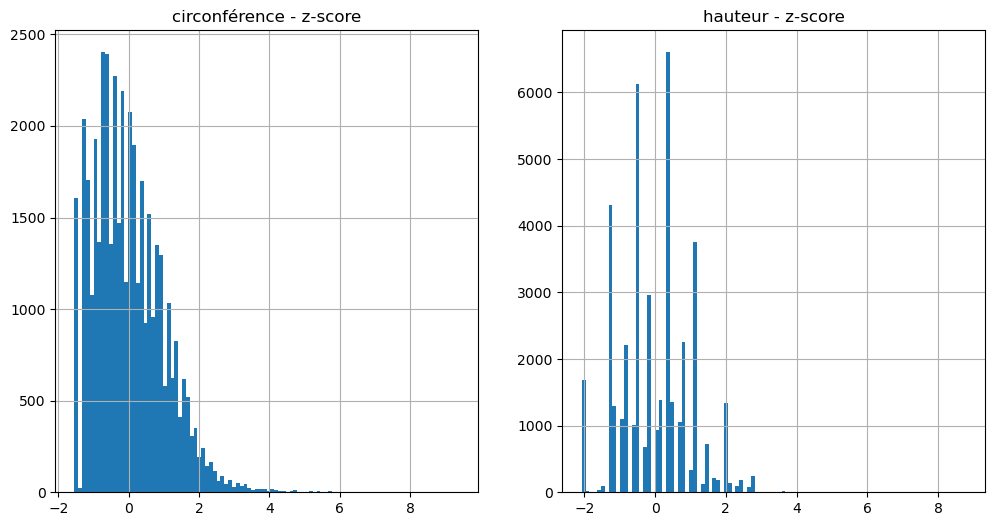

In [66]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.hist(df.z_circonference, 100)
ax.grid(True, which = 'both')
ax.set_title('circonférence - z-score')
ax = fig.add_subplot(1, 2, 2)
df.z_hauteur.hist(bins = 100)
ax.grid(True, which = 'both')
ax.set_title('hauteur - z-score')

In [96]:
# dans le z-score on prendra les seulis < à 2 ou < 3
# Methode 2

import numpy as np

print("arbres avec données circonférence aberrante =", df[df.z_circonference>2].shape[0])
print("circonférence max", np.max( df[df.z_circonference<2].circonference_cm),"cm\n")
print("arbres avec données hauteur aberrante =", df[df.z_hauteur>2].shape[0])
print("hauteur max", np.max( df[df.z_hauteur<2].hauteur_m),"m")

arbres avec données circonférence aberrante = 1429
circonférence max 254.0 cm

arbres avec données hauteur aberrante = 793
hauteur max 25.0 m


### Méthode IQR

In [106]:
import numpy as np

iqr = np.quantile(df.hauteur_m, q=[0.25, 0.75])
limite_basse = iqr[0] - 1.5*(iqr[1] - iqr[0])
limite_haute = iqr[1] + 1.5*(iqr[1] - iqr[0])

print("min hauteure = ",limite_basse,"\nmax hauteur = ", limite_haute)

min hauteure =  -5.5 
max hauteur =  30.5


In [108]:
print("arbres avec données hauteur aberrante =", df[df.hauteur_m>limite_haute].shape[0])
print("hauteur max", np.max( df[df.hauteur_m<limite_haute].hauteur_m),"m")

arbres avec données hauteur aberrante = 44
hauteur max 30.0 m


### Méthode Log

In [111]:
# log
df['circonference_log'] = np.log(df.circonference_cm + 1)
df['hauteur_log'] = np.log(df.hauteur_m + 1)

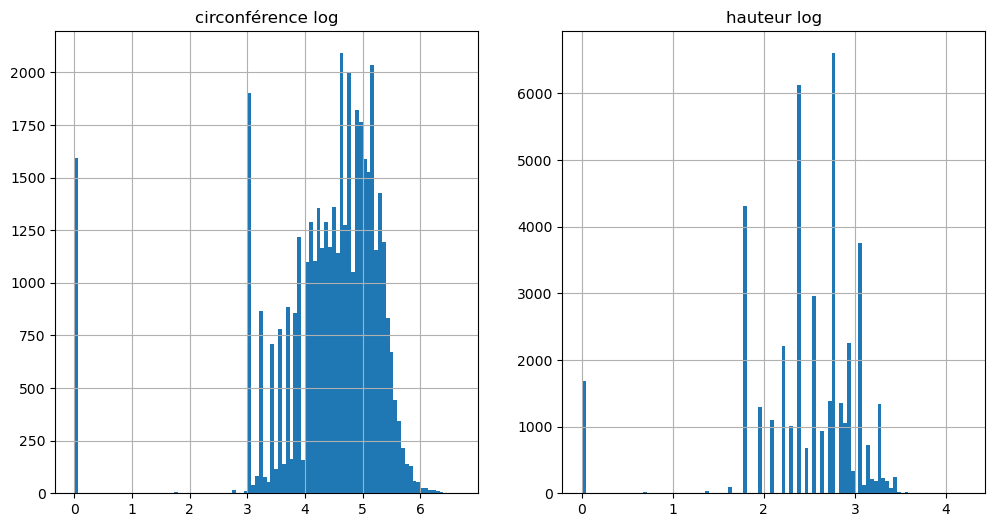

In [121]:
fig =  plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.hist(df.circonference_log, 100)
ax.set_title("circonférence log")
ax.grid()

ax = fig.add_subplot(1,2,2)
ax.hist(df.hauteur_log, 100)
ax.set_title("hauteur log")
ax.grid()

In [129]:
# on voit qu'on arrive à isoler les aoutliers plus facilement et du coup on peut appliquer la méhtode z_score à la valeur logaritmique 

df["z_circonference_log"] = stats.zscore(df.circonference_log)
df["z_hauteur_log"] = stats.zscore(df.hauteur_log)
print("arbres avec données circonférence aberrante =", df[df.z_circonference_log>2].shape[0])
print("hauteur max", np.min( df[df.z_circonference_log>2].circonference_cm),"cm\n")
print("arbres avec données hauteur aberrante =", df[df.z_hauteur_log>2].shape[0])
print("hauteur max", np.max( df[df.z_hauteur_log<2].hauteur_m),"m")

arbres avec données circonférence aberrante = 2
hauteur max 740.0 cm

arbres avec données hauteur aberrante = 3
hauteur max 40.0 m


Montrons que prendre le log de la variable permet de reduire fortement sa dispersion et donc de conserver les valeurs outliers lorsque l'on les considère valides. En effet pour la circonférence Il n'y a plus que 2 arbres qui soient au dela de 2 ecart type.

